# Ordinary kridging
[Kridging](https://en.wikipedia.org/wiki/Kriging) is a spatial interpolation algorithm. This example is taken from the [PyKrige](https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/examples/00_ordinary.html) documentation. In this example a 2D array is used to represent the x and y coordinates of 4 data points with the corresponding z value.
The dataset is passed to the OrdinaryKriging that computes the variogram according to a model, e.g. linear, and the kriged data for all the 11x11 points in the grid. The variogram $\gamma(h)$ is a function, computed using a data sample, that represents the variation of a variable of interest within a region

$$\gamma(h) = \frac{1}{2m(h)} \sum_{i=1}^{m(h)} [z(x_i) - z(x_i + h)]^2 $$

Here h is the lag, that is the distance between two data points, and m(h) is the number of paired comparisons at lag h. The variogram is used to compute the weights of the kridging.

$$\hat Z(x_0) = \sum_{i=1}^N \lambda_i z(x_i)$$

$Z(x_0)$ is the kridged value of the z variable computed at a point $x_0$ based on the values at the sample data points. The formula is used to compute the Z values at the grid points.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

## The observations dataset
We use a 2D NumPy array with the [x, y, z] columns to store the observations. These observations will be used to compute the variogram and predict the z values for the nodes in a grid.

In [34]:
data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

## The grid
We create a grid of 11x11 nodes spaced 0.5 units over our area of interest, in some unspecified projected reference system that contains our datapoints

In [35]:
gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

## Computing the variogram and the kridged data
We use the OrdinaryKriging module to compute the variogram according to a model among linear, exponential or gaussian. The linear, exponential and gaussian models show similar results.

In [24]:
OK = OrdinaryKriging(
    data[:, 0],  # x coordinates
    data[:, 1],  # y coordinates
    data[:, 2],  # z values at (x, y)
    variogram_model='linear', 
    verbose=False,
    enable_plotting=False,
)

In [37]:
z, ss = OK.execute("grid", gridx, gridy)

## Kridging visualization

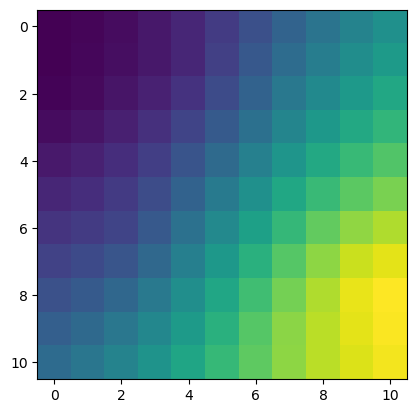

In [27]:
kt.write_asc_grid(gridx, gridy, z, filename="kridging_output.asc")
plt.imshow(z)
plt.show()